In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('gadfly.mplstyle')

In [34]:
df = pd.read_csv('speedtest.csv', header=[0, 1, 2], index_col=0)
df = df.T
df['S1'] = df['n']/df['R1']*60
df['S2'] = df['n']/df['R2']*60
df['S3'] = df['n']/df['R3']*60
df = df[['S1','S2','S3']]
df = pd.melt(df.reset_index(), id_vars=['CPU', 'Tool', 'Specie'], var_name='Replicates', value_name='Genomes/minute')
df['Specie'] = '$\it{' + df['Specie'].astype(str) + '}$'
df

,CPU,Tool,Specie,Replicates,Genomes/minute
0,1 CPU,PubMLST,$\it{B. cepacia}$,S1,5.611997
1,1 CPU,PubMLST,$\it{C. botulinum}$,S1,10.768389
2,1 CPU,PubMLST,$\it{M. pneumoniae}$,S1,20.213882
3,1 CPU,CGE/MLST,$\it{B. cepacia}$,S1,20.130487
4,1 CPU,CGE/MLST,$\it{C. botulinum}$,S1,54.244643
...,...,...,...,...,...
202,64 CPU,mlst,$\it{C. botulinum}$,S3,79.204993
203,64 CPU,mlst,$\it{M. pneumoniae}$,S3,161.396929
204,64 CPU,FastMLST,$\it{B. cepacia}$,S3,486.126236
205,64 CPU,FastMLST,$\it{C. botulinum}$,S3,1328.727079


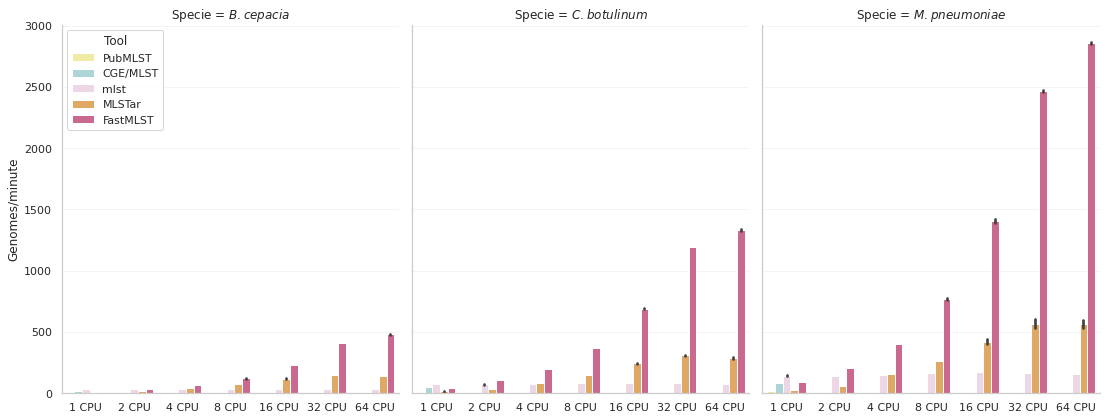

In [30]:
import seaborn as sns
import numpy as np
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + float(space)
#                 value = int(p.get_height())
                value = 0 if (np.isnan(p.get_height())) else '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", size='xx-small') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
#                 value = int(p.get_width())
                value = 0 if (np.isnan(p.get_width())) else '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left", size='xx-small')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

sns.set_theme(style="whitegrid")
palette = ['#FCF695', '#A6DCDE', '#F1D2E7', '#F3AA51', '#D9598C', '#B7D3E9', '#BBB0DC', '#DB706C', '#F1C3AA', '#CEE5D5', '#A7E0E1', '#A0522D', '#145250', '#4B0299']
g = sns.catplot(x="CPU", y="Genomes/minute",
                hue="Tool", col="Specie",
                data=df, kind="bar",
                height=6, aspect=0.85, sharey=True,
                order=df["CPU"].unique(), 
                hue_order=["PubMLST", "CGE/MLST", 'mlst', 'MLSTar', 'FastMLST'],
                palette=sns.color_palette(palette), ci='sd', legend_out=False)
ax1, ax2, ax3 = g.axes[0]
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

# ax1.axhline(1, ls='--')
# ax2.axhline(1, ls='--')
# ax3.axhline(1, ls='--')
# show_values_on_bars(ax1, space=10)
# show_values_on_bars(ax2, space=10)
# show_values_on_bars(ax3, space=10)
g.savefig('speedtest.pdf', dpi=1000)
g.savefig('speedtest.jpg', dpi=1000)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

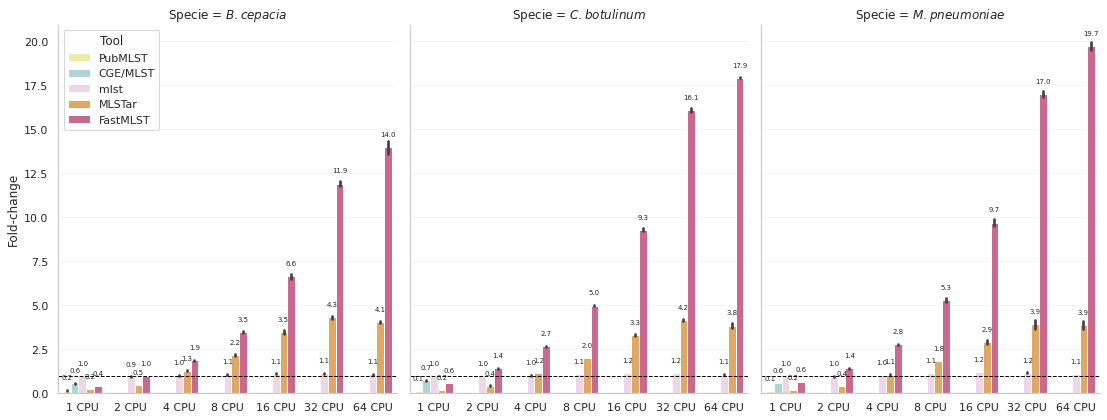

In [29]:
fold = []
labels = 'Fold-change'
for replicate, dfg in df.groupby('Replicates'):
    for scheme, dfgg in dfg.groupby('Specie'):
        base = dfgg.iloc[3]['Genomes/minute']
        dfgg[labels] = dfgg['Genomes/minute']/base
        fold.append(dfgg)
pd.concat(fold)
g = sns.catplot(x="CPU", y=labels,
                hue="Tool", col="Specie",
                data=pd.concat(fold), kind="bar",
                height=6, aspect=0.85, sharey=True,
                order=df["CPU"].unique(), 
                hue_order=["PubMLST", "CGE/MLST", 'mlst', 'MLSTar', 'FastMLST'],
                palette=sns.color_palette(palette), ci='sd', legend_out=False)
ax1, ax2, ax3 = g.axes[0]
ax1.axhline(1, ls='--', color='black', lw=1)
ax2.axhline(1, ls='--', color='black', lw=1)
ax3.axhline(1, ls='--', color='black', lw=1)
show_values_on_bars(ax1, space=0.6)
show_values_on_bars(ax2, space=0.6)
show_values_on_bars(ax3, space=0.6)
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
g.savefig('speedtest_fold.pdf', dpi=1000)
g.savefig('speedtest_fold.jpg', dpi=1000)